# Stat 159 Final Project: Diabetes 
### By Bruce, Sam, Duy-Anh, Donghoon

In [7]:
#import statements
import numpy as np 
import pandas as pd
import matplotlib.pyplot as plt
import statsmodels.formula.api as sm 
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier 
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix, mean_squared_error
from sklearn.preprocessing import StandardScaler
from sklearn import tree


In [8]:
#read data set csv
diabetes_binary_dataset =  pd.read_csv("../data/diabetes_binary_health_indicators_BRFSS2015.csv")

#### Please see our EDA.ipynb file to get a better understanding of the datasets before continuing into the analysis/modeling section below.

### OLS Regression  

In [9]:
#7 numeric features dataframe
diabetes_binary_dataset[['BMI' , 'Income' , 'Education' , 'Age' , 'GenHlth' , 'MentHlth' , 'PhysHlth']]

,BMI,Income,Education,Age,GenHlth,MentHlth,PhysHlth
0,40.0,3.0,4.0,9.0,5.0,18.0,15.0
1,25.0,1.0,6.0,7.0,3.0,0.0,0.0
2,28.0,8.0,4.0,9.0,5.0,30.0,30.0
3,27.0,6.0,3.0,11.0,2.0,0.0,0.0
4,24.0,4.0,5.0,11.0,2.0,3.0,0.0
...,...,...,...,...,...,...,...
253675,45.0,7.0,6.0,5.0,3.0,0.0,5.0
253676,18.0,4.0,2.0,11.0,4.0,0.0,0.0
253677,28.0,2.0,5.0,2.0,1.0,0.0,0.0
253678,23.0,1.0,5.0,7.0,3.0,0.0,0.0


We did OLS regression on the first columns using the 7 numeric features (BMI, Income, Education, Age, General Health, Mental Health, Physical Health) to determine which features would be a valid in modeling the factors that affect diabetes. 

In [10]:
model1 = sm.ols('Diabetes_binary ~  BMI + Income + Education + Age + GenHlth + MentHlth + PhysHlth', data = diabetes_binary_dataset)
results = model1.fit()
print(results.summary())

                            OLS Regression Results                            
Dep. Variable:        Diabetes_binary   R-squared:                       0.133
Model:                            OLS   Adj. R-squared:                  0.133
Method:                 Least Squares   F-statistic:                     5554.
Date:                Wed, 10 May 2023   Prob (F-statistic):               0.00
Time:                        21:59:34   Log-Likelihood:                -72849.
No. Observations:              253680   AIC:                         1.457e+05
Df Residuals:                  253672   BIC:                         1.458e+05
Df Model:                           7                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     -0.3384      0.006    -61.496      0.0

Given that dependent variable Diabetes_binary is binary (0 = no diabetes, 1 = diabetes), positive coefficients indicate higher likeliness to have diabetes while negative coefficient has lower likeliness to develop diabetes.

The f-statistic is 5554 and greater than 10, indicating that it's a strong model and has significant explanatory power. Thed F-value is greater than the critical value, we can reject the null hypothesis. The omnibus is 68880 which also indicates that there's a significant overall relationship between the predictors and variable of interest.  

The r-squared is 0.133 which indicates that the model is better at fitting the data than a horizontal line. 

The p-values of the intercept is 0 which indicate that the data is statistically significant at the 1% level (and 5% level). This means that we reject the null hypothesis for a significance test at 1% and we can be 99% confident that the independent variables has a significant effect on Diabetes_binary. 

The positive coefficients of BMI, age, general health indicate that as these numbers increase, the chances of getting diabetes also increases. This reasonable since older, more overweight (higher BMI), and people who rate their health poorly will have worse health than those who are fit and younger. 

The negative coefficients of income and education indicate that with higher income and better/more years of education, there's less likelihood that one will develop diabetes. More income likely allows easier access to better food and better medical help. 

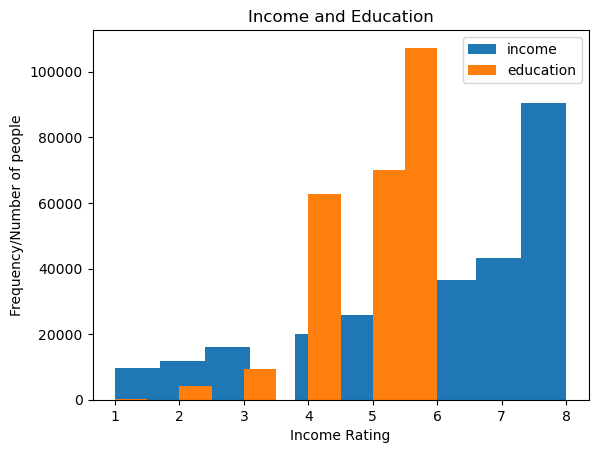

<Figure size 640x480 with 0 Axes>

In [11]:
plt.hist(x = diabetes_binary_dataset['Income'], label = "income")
plt.hist(x = diabetes_binary_dataset['Education'], label = "education")
plt.title('Income and Education')
plt.ylabel('Frequency/Number of people')
plt.xlabel('Income Rating')
plt.legend()
plt.show()
plt.savefig("../figures/figure5.png")

Looking at this histogram, the income are generally distributed towards the higher end which indicates that the dataset is sampling from a higher income class. Higher income generally leads to access to higher education with more resources to afford tutors, private schools, etc. These two variables may be correlated with each other.


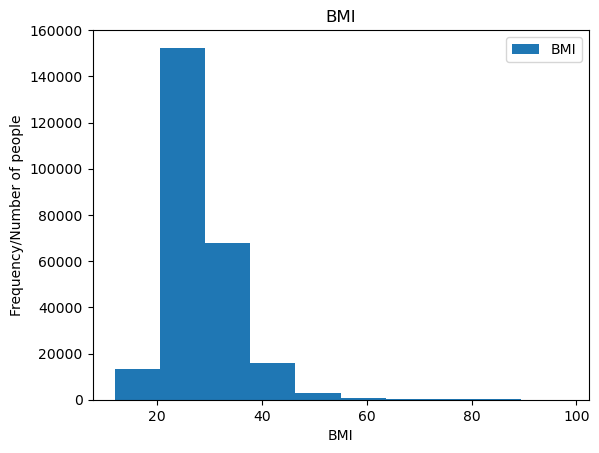

<Figure size 640x480 with 0 Axes>

In [12]:
plt.hist(x = diabetes_binary_dataset['BMI'], label = "BMI")
plt.title('BMI')
plt.ylabel('Frequency/Number of people')
plt.xlabel('BMI')
plt.legend()
plt.show()
plt.savefig("../figures/figure6.png")

In [13]:
diabetes_binary_dataset['BMI'].describe()

count    253680.000000
mean         28.382364
std           6.608694
min          12.000000
25%          24.000000
50%          27.000000
75%          31.000000
max          98.000000
Name: BMI, dtype: float64

BMI is generally classified into five categories: <br/> <br/>
Under 18.5 – This is described as underweight. <br/>
Between 18.5 and 24.9 – This is described as the ‘healthy range’.<br/>
Between 25 and 29.9 – This is described as overweight<br/>
Between 30 and 39.9 – This is described as obesity<br/>
40 or over – This is described as severe obesity<br/>

Looking at the BMI column, the data is centered around 27 and most people are on average around 28 on the BMI scale. 50% of the data is between 24 and 31 BMI, indicating that people in this range are classified as mostly overweight with a few in 'healthy' and 'obsese' range.

## Model Comparison

We want to compare the classification accuracy of different models. In terms of classification accuracy, we want to predict the label of whether a people have diabetes. In the original dataframe, the data in the first column work as labels, while the rest of the data would be training features. To train different models, we will split the original data randomly into training data and testing data with a ratio of 80/20. This is the standard approach that works efficiently in the industry.

### 1. Random Forest Classification

In [8]:
# Training preparation and train-test split
X = diabetes_binary_dataset.drop(['Diabetes_binary'], axis = 1)
y = diabetes_binary_dataset['Diabetes_binary']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=159)


In [9]:
# Model training and prediction
scaler = StandardScaler()
scaler.fit(X_train)
X_train = scaler.transform(X_train)
X_test = scaler.transform(X_test)
rf_model1 = RandomForestClassifier(n_estimators = 300, criterion = 'entropy', min_samples_split=10, random_state=159)
rf_model1.fit(X_train, y_train)

rf_model1_pred = rf_model1.predict(X_test)

In [10]:
# Model accuracy evaluation
rf_model1_accuracy = accuracy_score(y_test, rf_model1_pred)
rf_model1_rmse = mean_squared_error(y_test, rf_model1_pred)**0.5
print(f'testing accuracy: {rf_model1_accuracy}, rmse: {rf_model1_rmse}')

testing accuracy: 0.8656575212866604, rmse: 0.3665275961143167


### 2. Logistic Regression

In [11]:
# Training preparation and train-test split
X = diabetes_binary_dataset.drop(['Diabetes_binary'], axis = 1)
y = diabetes_binary_dataset['Diabetes_binary']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=159)

In [12]:
# Model training and prediction
scaler = StandardScaler()
scaler.fit(X_train)
X_train = scaler.transform(X_train)
X_test = scaler.transform(X_test)
logis_model = LogisticRegression()
logis_model.fit(X_train, y_train)
logis_model_pred = logis_model.predict(X_test)


In [13]:
# Model accuracy evaluation
logis_model_accuracy = accuracy_score(y_test, logis_model_pred)
logis_model_rmse = mean_squared_error(y_test, logis_model_pred)**0.5
print(f'accuracy: {logis_model_accuracy}, rmse: {logis_model_rmse}')

accuracy: 0.8628981393882056, rmse: 0.37027268412859515


### 3. Decision Tree

In [14]:
# Training preparation and train-test split
X = diabetes_binary_dataset.drop(['Diabetes_binary'], axis = 1)
y = diabetes_binary_dataset['Diabetes_binary']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=159)

In [5]:
# Model training and prediction
from diabetes-analysis-pkg-0.0.1.diabetes_analysis_tools import  logistic_pred 

SyntaxError: invalid syntax (2749274692.py, line 2)

In [16]:
# Model accuracy evaluation
dt_model_accuracy = accuracy_score(y_test, dt_model_pred)
dt_model_rmse = mean_squared_error(y_test, dt_model_pred)**0.5
print(f'accuracy: {dt_model_accuracy}, rmse: {dt_model_rmse}')

accuracy: 0.8599810785241249, rmse: 0.3741910227088233


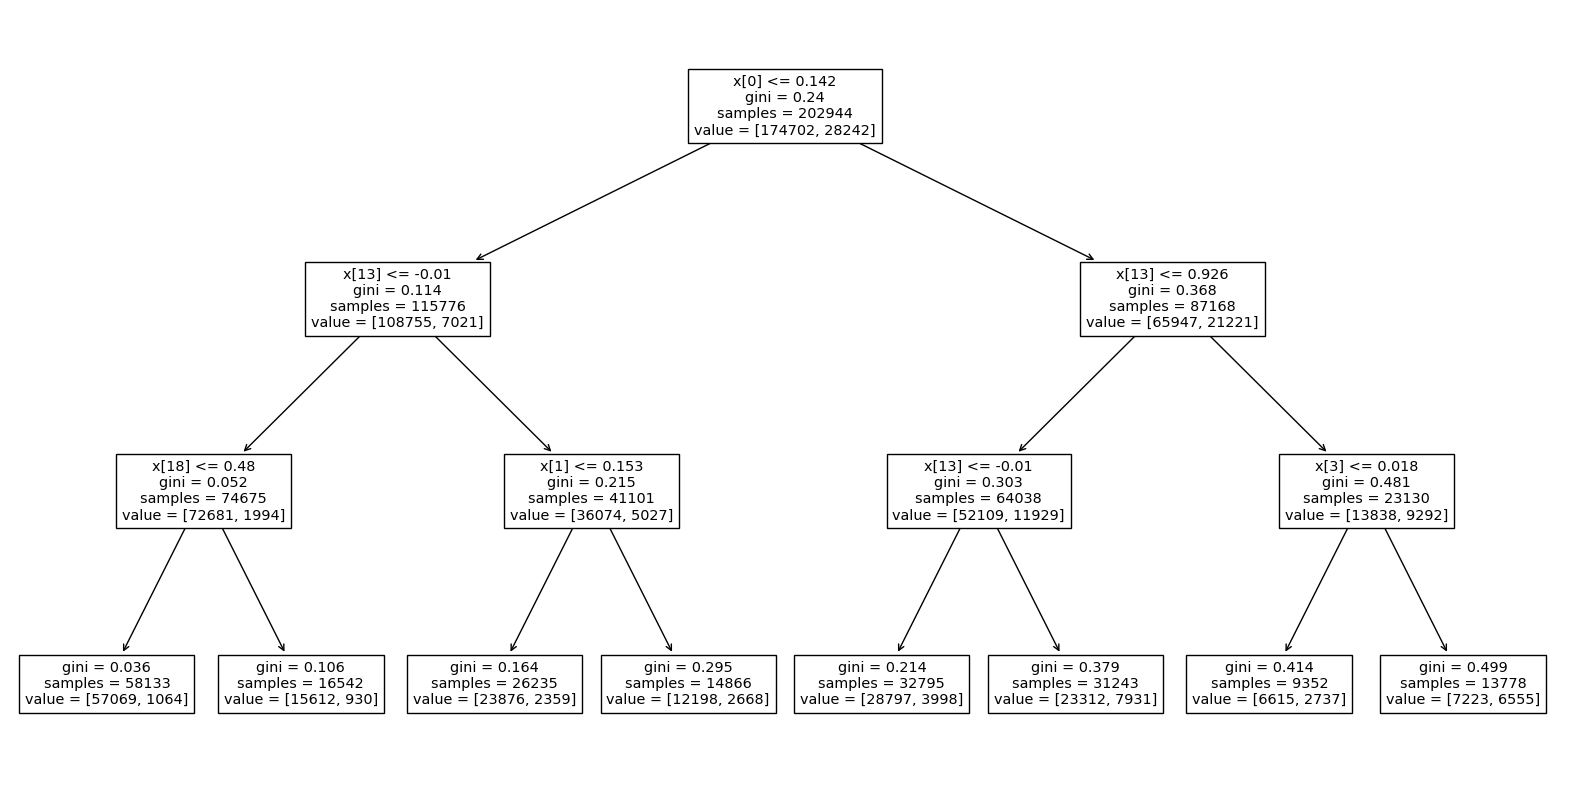

<Figure size 640x480 with 0 Axes>

In [18]:
# plotting decision tree classifier
plt.figure(figsize = (20,10))
tree.plot_tree(dt_model)
plt.show()
plt.savefig("../figures/figure7.png")

### 4. K Nearest Neighbor (KNN)

In [18]:
# Training preparation and train-test split
X = diabetes_binary_dataset.drop(['Diabetes_binary'], axis = 1)
y = diabetes_binary_dataset['Diabetes_binary']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=159)

In [19]:
# Model training and prediction
scaler = StandardScaler()
scaler.fit(X_train)
X_train = scaler.transform(X_train)
X_test = scaler.transform(X_test)
knn_model = KNeighborsClassifier(n_neighbors = 3)
knn_model.fit(X_train, y_train)
knn_model_pred = knn_model.predict(X_test)

In [20]:
# Model accuracy evaluation
knn_model_accuracy = accuracy_score(y_test, knn_model_pred)
knn_model_rmse = mean_squared_error(y_test, knn_model_pred)**0.5
print(f'accuracy: {knn_model_accuracy}, rmse: {knn_model_rmse}')

accuracy: 0.8366051718700726, rmse: 0.4042212613531449


From comparing the four models above, we can see that the KNN method generated a very low accuracy compared to other three classification models. It only achieved an accuracy of 0.837 in on the test set. The other three models have similar accuracies. We can see that those three models all give an accuracy of around 0.86, while the random forest model achieved an accuracy of 0.866. Since this model gave the highest accuracy, we decide to further investigate the random forest model and try to optimize the accuracy of the random forest model.

## Model Optimization

### Drop Duplicates

In [5]:
diabetes_binary_dataset.drop_duplicates(inplace = True)

In [6]:
# Training preparation and train-test split
X = diabetes_binary_dataset.drop(['Diabetes_binary'], axis = 1)
y = diabetes_binary_dataset['Diabetes_binary']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=159)
X_train.to_csv("../data/xtrain.csv")
X_test.to_csv("../data/xtest.csv")
y_train.to_csv("../data/ytrain.csv")
y_test.to_csv("../data/ytest.csv")

In [23]:
# Model training and prediction
scaler = StandardScaler()
scaler.fit(X_train)
X_train = scaler.transform(X_train)
X_test = scaler.transform(X_test)
rf_model1 = RandomForestClassifier(n_estimators = 300, criterion = 'entropy', min_samples_split=10, random_state=159)
rf_model1.fit(X_train, y_train)
rf_model1_pred = rf_model1.predict(X_test)

In [24]:
# Model accuracy evaluation
rf_model1_accuracy = accuracy_score(y_test, rf_model1_pred)
rf_model1_rmse = mean_squared_error(y_test, rf_model1_pred)**0.5
print(f'accuracy: {rf_model1_accuracy}, rmse: {rf_model1_rmse}')

accuracy: 0.8535134546246868, rmse: 0.3827356076658053


It seems that dropping duplicates did not increase training accuracy. This is probably caused by overfitting. To determine if there is an overfitting, let's display both the training accuracy and testing accuracy.

In [25]:
# Check Overfitting
rf_model1_pred_train = rf_model1.predict(X_train)
rf_model1_accuracy_train = accuracy_score(y_train, rf_model1_pred_train)
rf_model1_rmse_train = mean_squared_error(y_train, rf_model1_pred_train)**0.5
rf_model1_accuracy = accuracy_score(y_test, rf_model1_pred)
rf_model1_rmse = mean_squared_error(y_test, rf_model1_pred)**0.5
print(f'training accuracy: {rf_model1_accuracy_train}, rmse: {rf_model1_rmse_train}')
print(f'testing accuracy: {rf_model1_accuracy}, rmse: {rf_model1_rmse}')

training accuracy: 0.9110846011798736, rmse: 0.2981868521919209
testing accuracy: 0.8535134546246868, rmse: 0.3827356076658053


Since the training accuracy is much higher than the testing accuracy, we confirm the existence of overfitting. Let's try reduce overfitting by modifying the stopping criterion of the decision trees incorporated in the random forest model.

In [26]:
rf_model1 = RandomForestClassifier(n_estimators = 300, criterion = 'entropy', min_samples_split=30, random_state=159)
rf_model1.fit(X_train, y_train)
rf_model1_pred = rf_model1.predict(X_test)
rf_model1_pred_train = rf_model1.predict(X_train)
rf_model1_accuracy_train = accuracy_score(y_train, rf_model1_pred_train)
rf_model1_rmse_train = mean_squared_error(y_train, rf_model1_pred_train)**0.5
rf_model1_accuracy = accuracy_score(y_test, rf_model1_pred)
rf_model1_rmse = mean_squared_error(y_test, rf_model1_pred)**0.5
print(f'training accuracy: {rf_model1_accuracy_train}, rmse: {rf_model1_rmse_train}')
print(f'testing accuracy: {rf_model1_accuracy}, rmse: {rf_model1_rmse}')

training accuracy: 0.8738145430577572, rmse: 0.35522592380377144
testing accuracy: 0.8544503758579366, rmse: 0.3815096645460812


We can see that although the overfitting problem is solved, the testing accuracy seemed to improve only by a little. Therefore, dropping duplicated records may not be a good idea to improve testing accuracy. This is reasonable because the duplicated data appeared in the original dataset was not manually added by mistake. Instead, if duplicated data appeared, it means this specific "pattern of data" just appear more frequently than other records in the dataset. We can just return to our original dataset and try another way of optimizing the model.

### Balance Data

Balancing a dataset makes training a model easier because it helps prevent the model from becoming biassed towards one class. In other words, the model will no longer favour the majority class just because it contains more data.

In [27]:
diabetes_binary_dataset =  pd.read_csv("../data/diabetes_binary_health_indicators_BRFSS2015.csv")
# over sampling of the dataset to get a balanced dataset
class_0 = diabetes_binary_dataset[diabetes_binary_dataset['Diabetes_binary'] == 0]
class_1 = diabetes_binary_dataset[diabetes_binary_dataset['Diabetes_binary'] == 1]

# over sampling of the minority class 1
class_1_over = class_1.sample(len(class_0), replace=True)

# Creating a new dataframe with over sampled class 1 df and class 0 df
diabetes_binary_dataset_new = pd.concat([class_1_over, class_0], axis=0)

In [28]:
X = diabetes_binary_dataset_new.drop(['Diabetes_binary'], axis = 1)
y = diabetes_binary_dataset_new['Diabetes_binary']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=159)

In [29]:
# Model training and prediction
scaler = StandardScaler()
scaler.fit(X_train)
X_train = scaler.transform(X_train)
X_test = scaler.transform(X_test)
rf_model1 = RandomForestClassifier(n_estimators = 300, criterion = 'entropy', min_samples_split=10, random_state=159)
rf_model1.fit(X_train, y_train)
rf_model1_pred = rf_model1.predict(X_test)

In [30]:
# Model accuracy evaluation
rf_model1_accuracy = accuracy_score(y_test, rf_model1_pred)
rf_model1_rmse = mean_squared_error(y_test, rf_model1_pred)**0.5
print(f'accuracy: {rf_model1_accuracy}, rmse: {rf_model1_rmse}')

accuracy: 0.9138708864817826, rmse: 0.2934776201317869


As we can see, the accuracy now becomes 0.913, which brings a significant progress from our previous random forest model. Balancing the data creates a significant improvement because our original data is very unbalanced, which means our original model was taking unbalanced weights across the binary diabetes status. Since balanced data is a required component to make a good random forest model, balancing the original dataset created a vast improvement in testing accuracy.

## Analysis of weights to get intuition

Magnitude of the coefficients can be influenced by the scaling of the input features so we scale the values of each feature. Proper scaling can help ensure that each feature is treated fairly and that the relative importance of each feature is more accurately reflected in the model's coefficients. In particular, when using logistic regression, it is important to ensure that the input features are on similar scales so that the regularization penalty is distributed evenly across all features.

Therefore, We use the 'StandardScaler' from scikit-learn to scale the input features. This scaler centers the data at zero and scales it to have a standard deviation of 1.

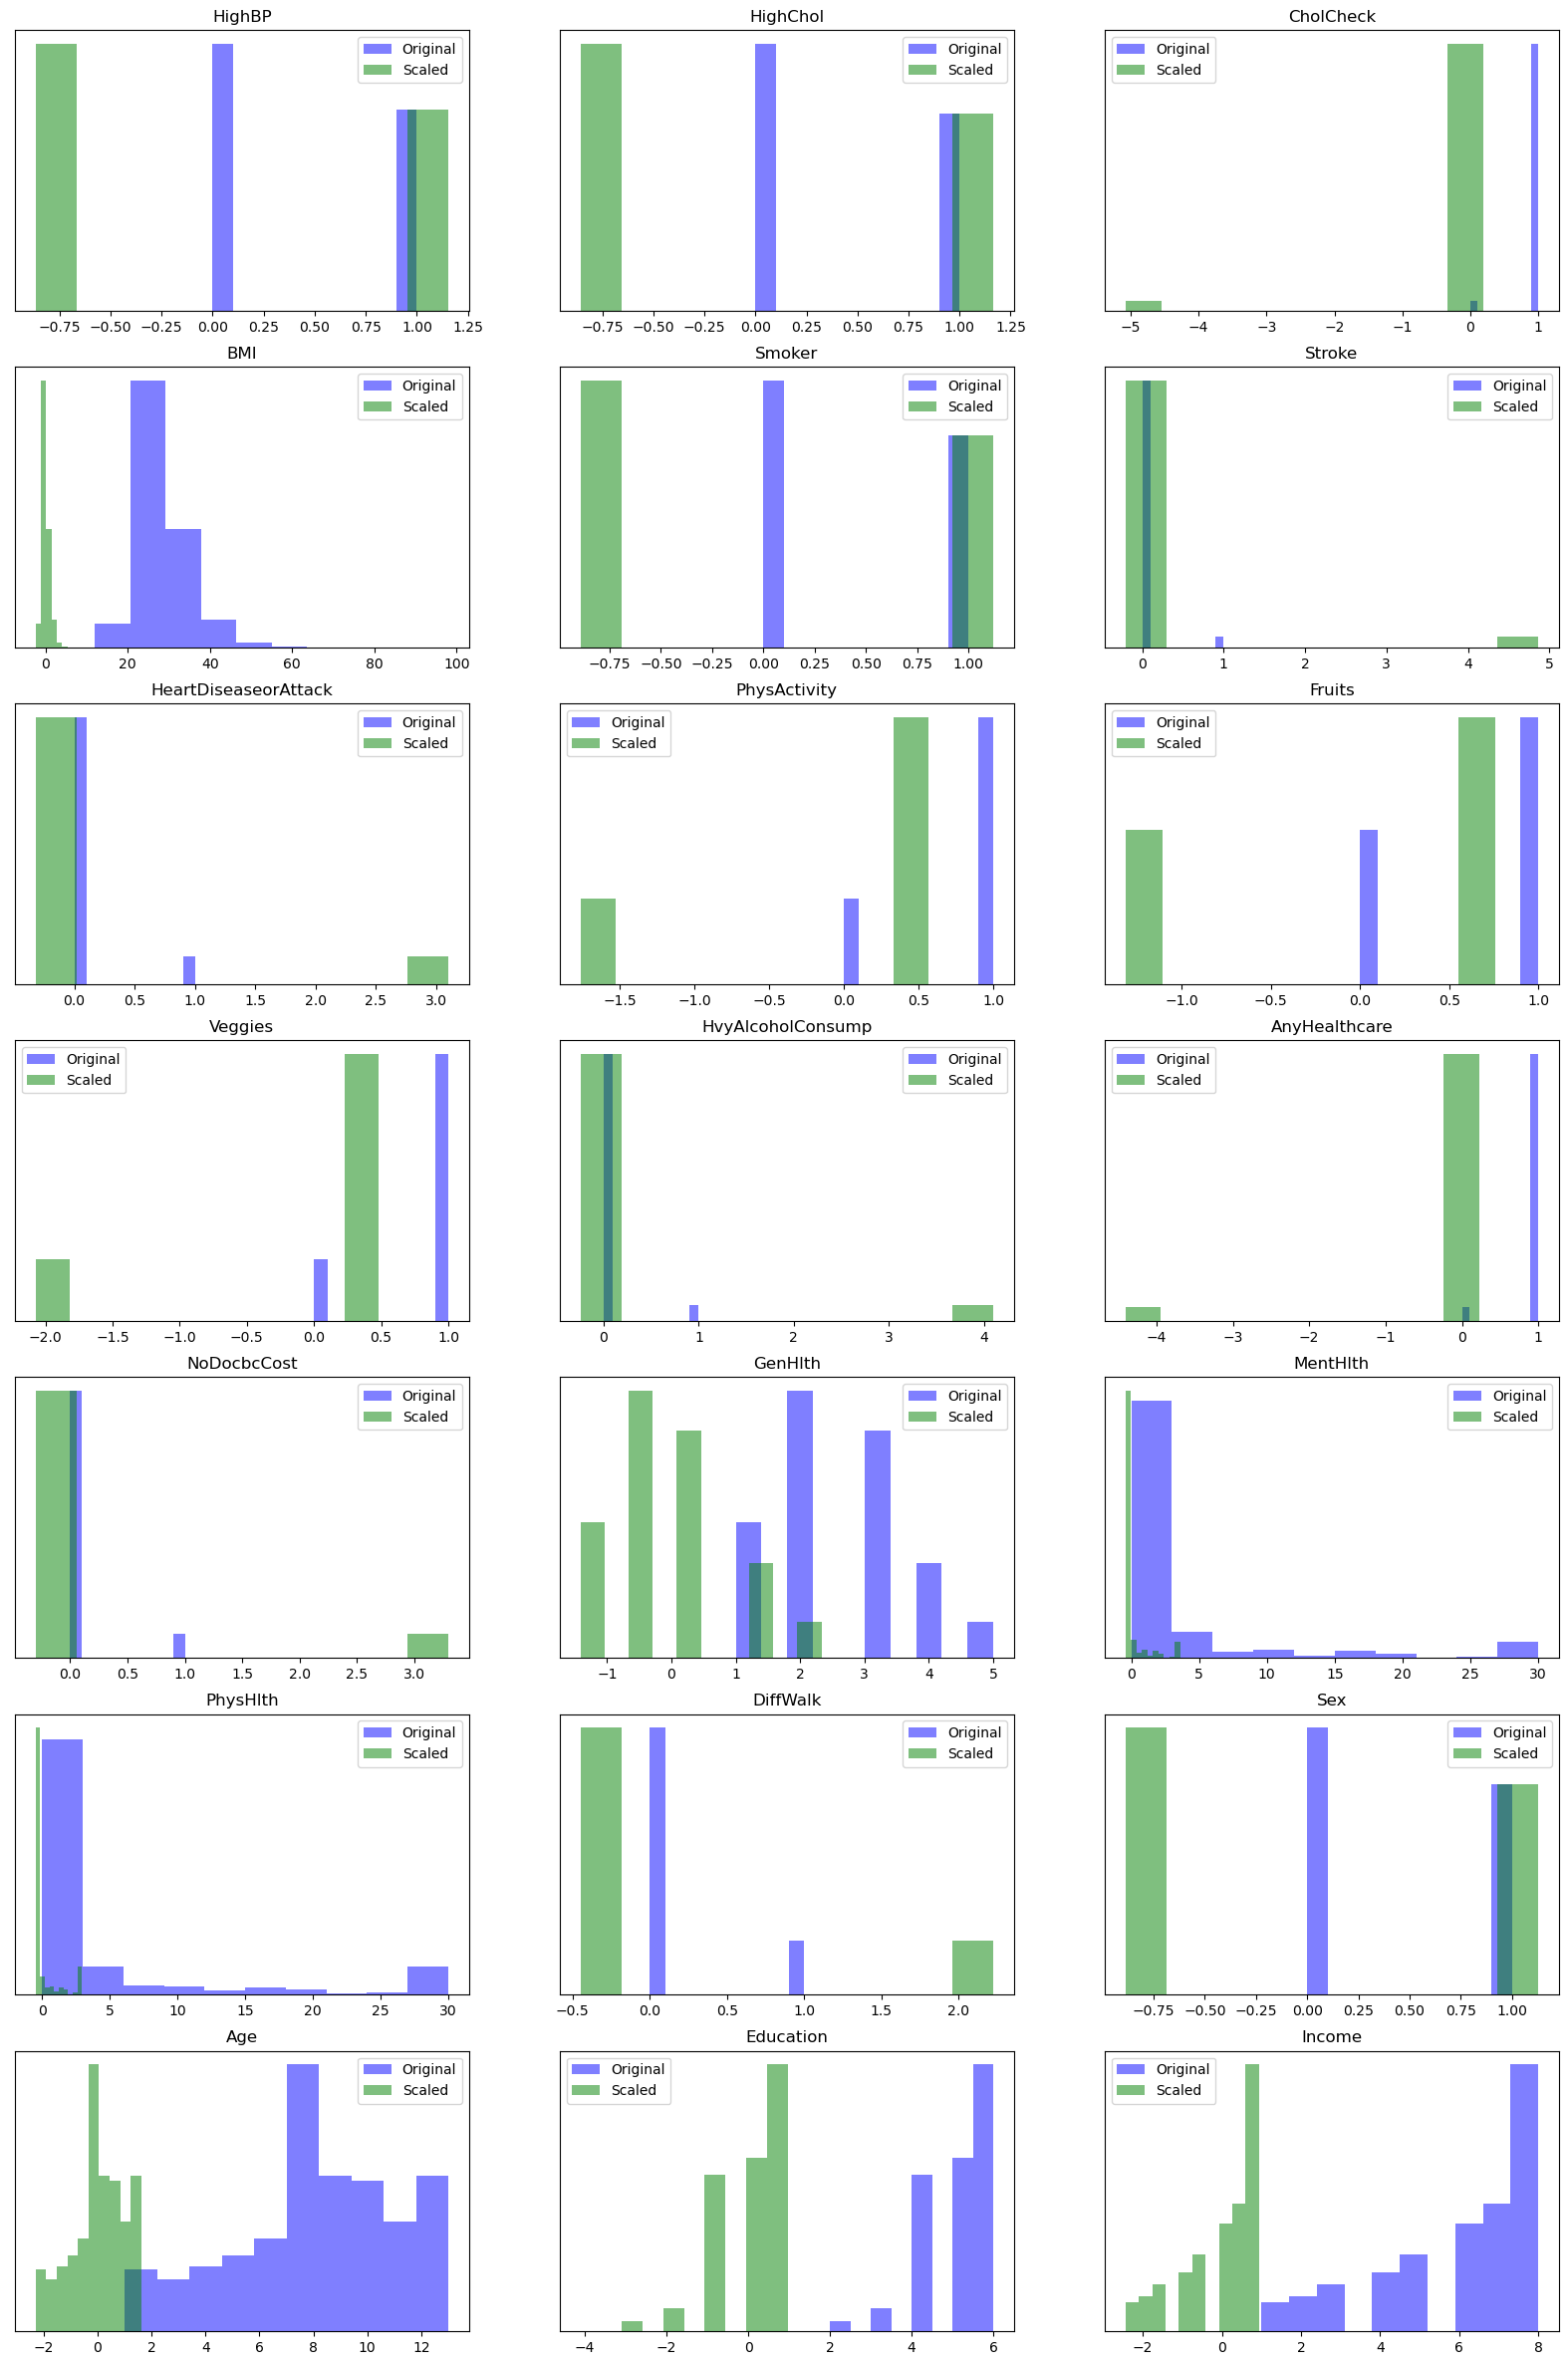

In [19]:
# Select the input variables
X = diabetes_binary_dataset.drop(['Diabetes_binary'], axis=1)

# Initialize the scaler
scaler = StandardScaler()

# Fit and transform the data
X_scaled = scaler.fit_transform(X)

# Define the number of rows and columns for the subplots
n_rows = 7
n_cols = 3

# Create the subplots
fig, axs = plt.subplots(n_rows, n_cols, figsize=(20, 30))

# Plot the original and scaled data for each variable
for i, col in enumerate(X.columns):
    row_idx = i // n_cols
    col_idx = i % n_cols

    axs[row_idx, col_idx].hist(X[col], alpha=0.5, color='blue', label='Original')
    axs[row_idx, col_idx].hist(X_scaled[:, i], alpha=0.5, color='green', label='Scaled')
    axs[row_idx, col_idx].set_title(col)
    axs[row_idx, col_idx].set_yticks([])
    axs[row_idx, col_idx].legend()

    # Add a title to each subplot
plt.savefig("../figures/figure8.png")

Accuracy: 0.87


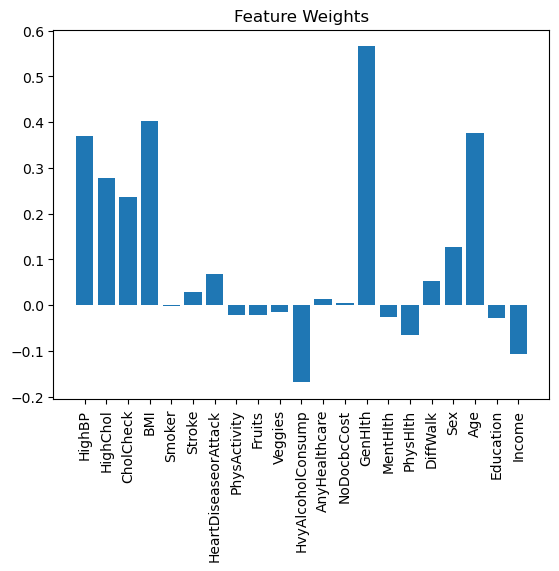

<Figure size 640x480 with 0 Axes>

In [20]:
y = diabetes_binary_dataset['Diabetes_binary']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)

# Define the logistic regression model with specific hyperparameters
logistic = LogisticRegression(C=0.1, penalty='l1', solver='liblinear', random_state=42)

# Train the model
logistic.fit(X_train, y_train)

# Evaluate the model
score = logistic.score(X_test, y_test)
print(f'Accuracy: {score:.2f}')

# Visualize the weights
weights = logistic.coef_[0]
features = X.columns
plt.bar(features, weights)
plt.xticks(rotation=90)
plt.title('Feature Weights')
plt.show()
plt.savefig("../figures/figure9.png")

The logistic regression analysis revealed that the top 5 highest positive weights in predicting diabetes are GenHlth (1 = excellent, 2 = very good, 3 = good, 4 = fair, 5 = poor), BMI, Age, HighBP, and HighChol. These findings align with our prior knowledge that these features are highly associated with the development of diabetes. Conversely, the top 5 negative weights are HvyAlcoholConsumption, income, PhysHlth, Education, and MentHlth. With the exception of HvyAlcoholConsumption, this negative correlation is also in line with our intuition that these features are generally negatively associated with the development of diabetes. Notably, the strong negative correlation with HvyAlcoholConsumption is an interesting finding, and suggests that people without diabetes may be more likely to engage in heavy alcohol consumption.

In addition to the top 5 features, other variables that are negatively correlated with diabetes include PhysActivity, Fruits, and Veggies, which are also consistent with our prior understanding. These findings provide reassurance that these variables are important predictors of diabetes. Overall, it is important to note that these results reflect correlations rather than causation, and additional research is necessary to further investigate these associations.

# Author Contributions Statement

### Bruce: 
I completed EDA for the binary diabetes dataset. I did some data cleaning work, dropped duplicated data, and created several visualizations to help the audience get a better understanding of the dataset.
I worked on the section of generating different classification models on the binary dataset. I compared their accuracies and conducted optimization on the random forest model and reorganized our repo structure to separate data, figures, notebooks, etc.

### Duy: 
I started main.ipynb and did ols regression on variables of interest: diabetes. I explained the OLS regression and its significance of the dataset and model. I added some visualization to better understand the relationship between some dependent variables and why they are significant to our project.

### Sam Tan: 
I made our work visable by publishing it online as a jupyterbook, with the help of a github workflow; Compose the README file with detailed descriptions of the project and the structure of the repository; Create the package; Improve Makefile commands based on Donghoon's work so the environment could be installed in one line; Update the Environment.yml with the correct verison for numpy.

### Donghoon Shin: 
I made our codebase reproducible by making environment.yml with makefile that creates conda environment and ipykernal. Also, I added scientific analysis of which features predict diabetes with logistic regression analysis.

I made our codebase reproducible by making environment.yml with makefile that creates conda environment and ipykernal. Also, I added scientific analysis of which features predict diabetes with logistic regression analysis.